In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [56]:
inputFile = pd.read_csv("code/Instances_5/results",sep="\t",index_col=False)
rows = inputFile["rows"]
columns = inputFile["columns"]
rows_proj = inputFile["rows_proj"]

In [57]:
#groupedData = inputFile.groupby(["rows","columns","rows_proj"])["P_feas_error","TP_feas_error","TD_feas_error","P-TP_dist","P-TD_dist"].mean()
#groupedData2 = inputFile.groupby(["rows","columns","rows_proj"])["obj_val_P","obj_val_TP","obj_val_TDP"].mean()
groupedData = inputFile.groupby(["rows","rows_proj"])["P_feas_error","TP_feas_error","TD_feas_error","P-TP_dist","P-TD_dist"].mean()
groupedData2 = inputFile.groupby(["rows","rows_proj"])["obj_val_P","obj_val_TP","obj_val_TDP"].mean()
groupedData = pd.DataFrame(groupedData)
for col in groupedData.columns:
    groupedData[col] = np.sqrt(groupedData[col])
groupedData3 = pd.merge(groupedData, groupedData2, left_index=True, right_index=True)
display(groupedData3.head())

C:\Users\leder\anaconda3\envs\learning2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leder\anaconda3\envs\learning2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


P_feas_error  TP_feas_error  TD_feas_error    P-TP_dist  \
rows rows_proj                                                            
210  42                  0.0   9.544093e+05  599824.617328  1070.435004   
     52                  0.0   9.496917e+05  583246.381422  1051.580096   
     70                  0.0   8.049158e+05  499378.494741   940.648706   
     105                 0.0   5.912296e+05  378705.449269   827.609849   
240  48                  0.0   1.063683e+06  642656.144887  1206.816139   

                 P-TD_dist    obj_val_P    obj_val_TP   obj_val_TDP  
rows rows_proj                                                       
210  42         835.276125  524377.7532  187817.98400  120888.61968  
     52         781.754878  551304.1614  237734.65592  133581.80308  
     70         768.596902  525573.4048  279996.15908  130768.33628  
     105        679.442148  534610.4098  346991.66272  103306.58596  
240  48         860.311671  600618.5186  226717.30200  148649.13428

In [58]:
#groupedData = inputFile.groupby(["rows","columns","rows_proj"])["P_feas_error","TP_feas_error","TD_feas_error","P-TP_dist","P-TD_dist"].mean()
#groupedData2 = inputFile.groupby(["rows","columns","rows_proj"])["obj_val_P","obj_val_TP","obj_val_TDP"].mean()
groupedData = inputFile.groupby(["rows","rows_proj"])["P_feas_error","TP_feas_error","TD_feas_error","P-TP_dist","P-TD_dist"].mean().reset_index()
groupedData2 = inputFile.groupby(["rows","rows_proj"])["obj_val_P","obj_val_TP","obj_val_TDP"].mean().reset_index()
groupedData = pd.DataFrame(groupedData)
for col in groupedData.columns:
    groupedData[col] = np.sqrt(groupedData[col])
groupedData3 = pd.merge(groupedData, groupedData2, left_index=True, right_index=True).drop(["rows_x","rows_proj_x"],axis=1)
display(groupedData3.head())

C:\Users\leder\anaconda3\envs\learning2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leder\anaconda3\envs\learning2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,P_feas_error,TP_feas_error,TD_feas_error,P-TP_dist,P-TD_dist,rows_y,rows_proj_y,obj_val_P,obj_val_TP,obj_val_TDP
0,0.0,9.544093e+05,599824.617328,1070.435004,835.276125,210,42,524377.7532,187817.98400,120888.61968
1,0.0,9.496917e+05,583246.381422,1051.580096,781.754878,210,52,551304.1614,237734.65592,133581.80308
2,0.0,8.049158e+05,499378.494741,940.648706,768.596902,210,70,525573.4048,279996.15908,130768.33628
3,0.0,5.912296e+05,378705.449269,827.609849,679.442148,210,105,534610.4098,346991.66272,103306.58596
4,0.0,1.063683e+06,642656.144887,1206.816139,860.311671,240,48,600618.5186,226717.30200,148649.13428


### feas_error (TP and TD) vs m,k

In [59]:
fraction = np.round(groupedData3["rows_proj_y"].to_numpy()/groupedData3["rows_y"].to_numpy(),2)
groupedData3["fraction"] = fraction
fraction_vals = sorted(list(set(fraction)))
groupedData3

,P_feas_error,TP_feas_error,TD_feas_error,P-TP_dist,P-TD_dist,rows_y,rows_proj_y,obj_val_P,obj_val_TP,obj_val_TDP,fraction
0,0.0,9.544093e+05,5.998246e+05,1070.435004,835.276125,210,42,5.243778e+05,1.878180e+05,120888.619680,0.20
1,0.0,9.496917e+05,5.832464e+05,1051.580096,781.754878,210,52,5.513042e+05,2.377347e+05,133581.803080,0.25
2,0.0,8.049158e+05,4.993785e+05,940.648706,768.596902,210,70,5.255734e+05,2.799962e+05,130768.336280,0.33
3,0.0,5.912296e+05,3.787054e+05,827.609849,679.442148,210,105,5.346104e+05,3.469917e+05,103306.585960,0.50
4,0.0,1.063683e+06,6.426561e+05,1206.816139,860.311671,240,48,6.006185e+05,2.267173e+05,148649.134280,0.20
5,0.0,9.160380e+05,5.691615e+05,1056.002658,813.539379,240,60,6.047714e+05,2.719374e+05,155181.134480,0.25
6,0.0,7.941888e+05,5.014504e+05,980.407065,779.357408,240,80,6.029885e+05,3.114060e+05,136799.628480,0.33
7,0.0,6.404408e+05,4.041447e+05,860.224714,732.971245,240,120,6.137835e+05,3.971554e+05,118150.243160,0.50
8,0.0,1.078865e+06,6.700628e+05,1177.223581,898.725433,270,54,6.967769e+05,2.735349e+05,173708.280400,0.20
9,0.0,9.374638e+05,5.656966e+05,1083.059880,831.650473,270,68,6.672357e+05,3.094069e+05,164188.727920,0.25


In [60]:
groupedData3[groupedData3["fraction"]==0.3]["TP_feas_error"]

Series([], Name: TP_feas_error, dtype: float64)

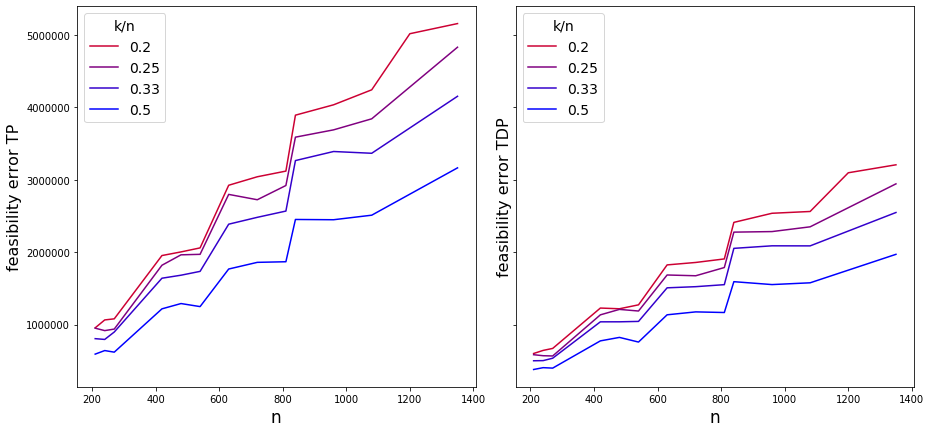

In [65]:
# graph feas_error (TP and TD) vs m,k

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7),sharey=True)

iter = 0
for fract in fraction_vals:
    iter += 1
    ax1.plot(list(groupedData3[groupedData3["fraction"]==fract]["rows_y"]),list(groupedData3[groupedData3["fraction"]==fract]["TP_feas_error"]),color=(1.0-np.round(iter/len(fraction_vals),1),0.0,np.round(iter/len(fraction_vals),1)),label=str(fract))

ax1.set_xlabel("n",fontsize=17)
ax1.set_ylabel("feasibility error TP",fontsize=16)
leg = ax1.legend(loc="upper left",fontsize=14)
leg.set_title("k/n",prop={'size':14})

iter = 0
for fract in fraction_vals:
    iter += 1
    ax2.plot(list(groupedData3[groupedData3["fraction"]==fract]["rows_y"]),list(groupedData3[groupedData3["fraction"]==fract]["TD_feas_error"]),color=(1.0-np.round(iter/len(fraction_vals),1),0.0,np.round(iter/len(fraction_vals),1)),label=str(fract))

ax2.set_xlabel("n",fontsize=17)
ax2.set_ylabel("feasibility error TDP",fontsize=16)
leg = ax2.legend(loc="upper left",fontsize=14)
leg.set_title("k/n",prop={'size':14})

plt.subplots_adjust(wspace=0.1)

plt.savefig("feasibility_error.png",dpi=600)

plt.show()

## obj_val (P,TP,TD) vs m,k

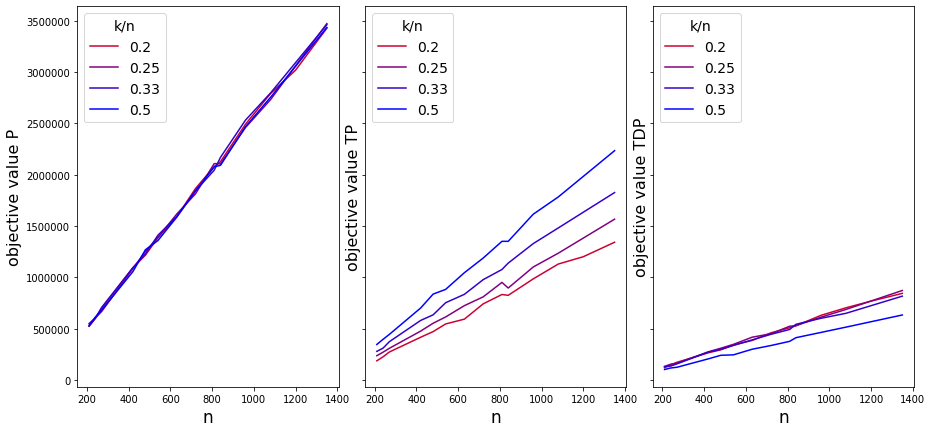

In [64]:
# graph feas_error (TP and TD) vs m,k

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7),sharey=True)

iter = 0
for fract in fraction_vals:
    iter += 1
    ax1.plot(list(groupedData3[groupedData3["fraction"]==fract]["rows_y"]),list(groupedData3[groupedData3["fraction"]==fract]["obj_val_P"]),color=(1.0-np.round(iter/len(fraction_vals),1),0.0,np.round(iter/len(fraction_vals),1)),label=str(fract))

ax1.set_xlabel("n",fontsize=17)
ax1.set_ylabel("objective value P",fontsize=16)
leg = ax1.legend(loc="upper left",fontsize=14)
leg.set_title("k/n",prop={'size':14})

iter = 0
for fract in fraction_vals:
    iter += 1
    ax2.plot(list(groupedData3[groupedData3["fraction"]==fract]["rows_y"]),list(groupedData3[groupedData3["fraction"]==fract]["obj_val_TP"]),color=(1.0-np.round(iter/len(fraction_vals),1),0.0,np.round(iter/len(fraction_vals),1)),label=str(fract))

ax2.set_xlabel("n",fontsize=17)
ax2.set_ylabel("objective value TP",fontsize=16)
leg = ax2.legend(loc="upper left",fontsize=14)
leg.set_title("k/n",prop={'size':14})


iter = 0
for fract in fraction_vals:
    iter += 1
    ax3.plot(list(groupedData3[groupedData3["fraction"]==fract]["rows_y"]),list(groupedData3[groupedData3["fraction"]==fract]["obj_val_TDP"]),color=(1.0-np.round(iter/len(fraction_vals),1),0.0,np.round(iter/len(fraction_vals),1)),label=str(fract))

ax3.set_xlabel("n",fontsize=17)
ax3.set_ylabel("objective value TDP",fontsize=16)
leg = ax3.legend(loc="upper left",fontsize=14)
leg.set_title("k/n",prop={'size':14})

plt.subplots_adjust(wspace=0.1)

plt.savefig("objective_val.png",dpi=600)

plt.show()